## Simple Logistic Regression analysis 

### Aim:
- To find the relation of housing values based on the income generation of the people.

Outline:                
1. Explore the dataset using pandas framework.
2. Visualize the dataset using matplotlib,seabon library.
3. Perform simple linear regression.
4. Build model using 'train-test-split method'.

About dataset:
Dataset 'housing details' is refere from the kaggle dataset.
reference link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement             
This data set consists of Placement data of students in a XYZ campus. It includes post graduation percentage and specialization. It also includes gender,higher secondary school percentage and salary offers to the placed students.                                                                          Here, on the basis of MBA course percentage studid are applied for the placements.

Dataset contains:
1. sl_no: serial number.
2. gender: gender of the student(male / female).
3. etest_p: percentage scored by the student in higher secondary school.(in %)
4. specialisation:field of specialisation of the student.
5. mba_p:percentage scored by the student in MBA.(in %)
6. status: status of the student where placed or not.
7. salary: salary offers to the placed students.


#### Import library

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

#### Read the file

In [95]:
df=pd.read_csv('Placement_Data.csv')
df

,sl_no,gender,etest_p,specialisation,mba_p,status,salary
0,1,M,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...
210,211,M,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,70.0,Mkt&HR,60.23,Placed,204000.0


#### Find shape  and size of the dataset

In [19]:
df.shape

(215, 7)

In [20]:
df.size

1505

#### Show the datatypes present in the data

In [21]:
df.dtypes

sl_no               int64
gender             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

#### Columns present in data as

In [71]:
df.columns

Index(['sl_no', 'gender', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

#### Gather information about the dataset.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   etest_p         215 non-null    float64
 3   specialisation  215 non-null    object 
 4   mba_p           215 non-null    float64
 5   status          215 non-null    object 
 6   salary          148 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 11.9+ KB


As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 1 integer (int64) and 3 float (float64(1)) and 3 (object) features.

#### Display the some rows of the dataset.

In [23]:
df.head()

,sl_no,gender,etest_p,specialisation,mba_p,status,salary
0,1,M,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,96.8,Mkt&Fin,55.50,Placed,425000.0


In [80]:
df.tail()

,sl_no,gender,etest_p,specialisation,mba_p,status,salary
210,211,M,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,89.0,Mkt&HR,60.22,Not Placed,0.0


## Data Cleaning
we will find the missing values in dataset and try to fill it. In order to fill missing values we use fillna method.

#### lets check for the null values

In [25]:
df.isnull().sum()

sl_no              0
gender             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There is contains 67 null values for salary column. need to make corrections to dataset.

#### Treating null values.
By uisng 'fillna' method, we fill the values in terms of backword filling or forward filling.


In [75]:
df['salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64>

 As dataset contains null values at salary column for not placed studets.
 To rectify, replace the null values with 'zeros'.

In [78]:
df['salary'] = df['salary'].replace(np.nan, 0)

In [79]:
df.isnull().sum()

sl_no             0
gender            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Now, no null values present in the dataset.

#### Describre the data.

In [96]:
df.describe(include='all')

,sl_no,gender,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,120,NaN,148,NaN
mean,108.000000,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,83.500000,NaN,66.255000,NaN,300000.000000


## Data Exploration

#### Let's explore the data.



###### By using Crosstab

In [82]:
df_app=pd.crosstab(df['gender'],df['status'])
df_app

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


#### observation:
- count of  male and female students those are placed is more than not place.

In [83]:
df_app=pd.crosstab(df['specialisation'],df['status'])
df_app

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


#### observation:
- Placed count of 'Mkt&Fin' specialize is more than 'Mkt&HR, specialize course.

#### Visualize the data

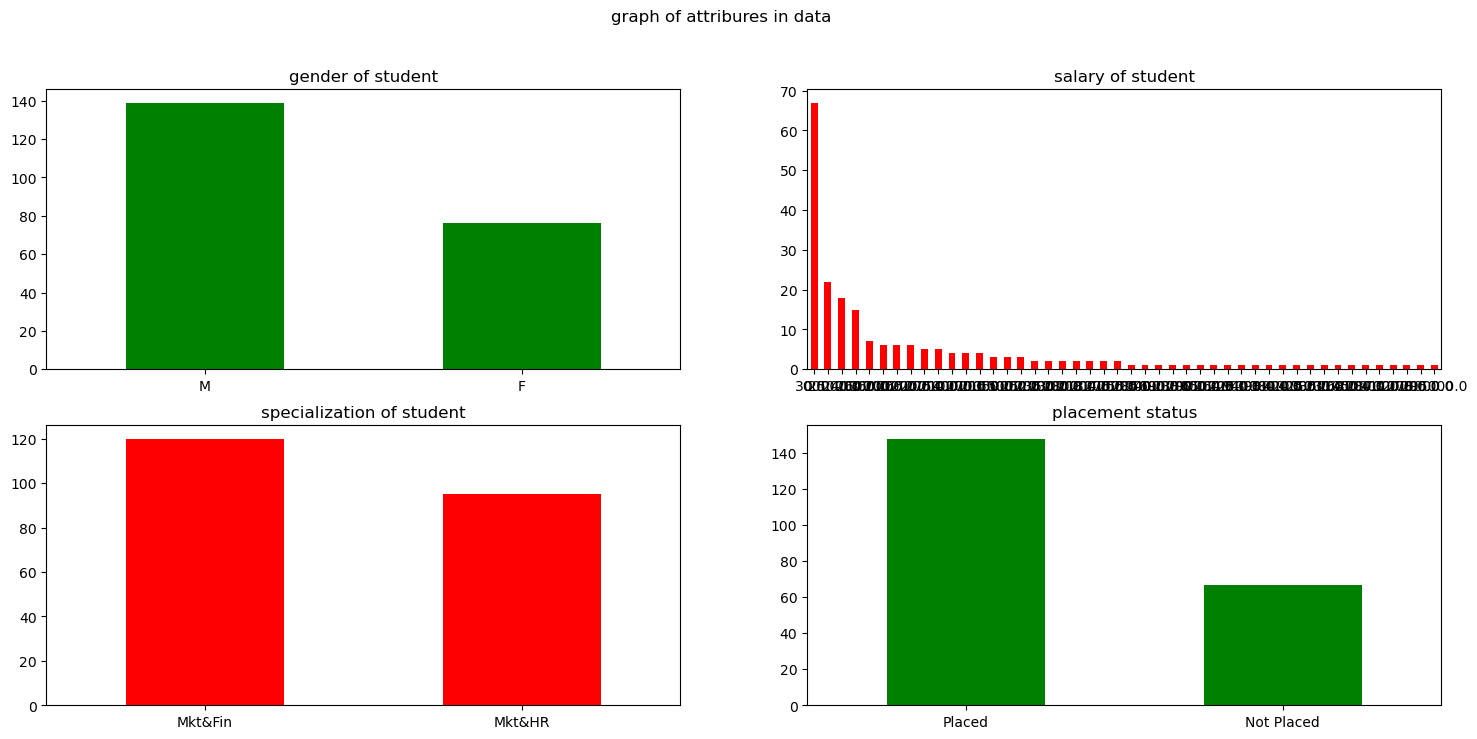

In [87]:
plt.subplot(2,2,1)
df['gender'].value_counts().plot(kind='bar',title='gender of student',figsize=(18,8),color='green')
plt.xticks(rotation=0)

plt.subplot(2,2,2)
df['salary'].value_counts().plot(kind='bar',title='salary of student',figsize=(18,8),color='red')
plt.xticks(rotation=0)

plt.subplot(2,2,3)
df['specialisation'].value_counts().plot(kind='bar',title='specialization of student',figsize=(18,8),color='red')
plt.xticks(rotation=0)

plt.subplot(2,2,4)
df['status'].value_counts().plot(kind='bar',title='placement status',figsize=(18,8),color='green')
plt.xticks(rotation=0)

plt.suptitle('graph of attribures in data')
plt.show()

#### Observation:
1. Graph of 'gender of student' shows count of male students is  more than female students.
2. Graph of 'placement of student' shows more no of students are placed in through campus.
3. Gaph of 'specialization of student' shows more no students admited for the 'Mkt&Fin' for the specialization than 'Mkt&HR'.
4. Graph of 'placement status' shows than more no of students are placed through campus recruitment.

## Data Mining

#### Remove the unnessesary data
for the analysis purpose remove the unnessesary data

In [97]:
df.drop(['salary'],axis=1,inplace=True)

In [98]:
df.drop(['sl_no'],axis=1,inplace=True)

In [99]:
df.drop(['gender'],axis=1,inplace=True)

In [100]:
df.drop(['etest_p'],axis=1,inplace=True)

In [101]:
df.drop(['specialisation'],axis=1,inplace=True)

In [102]:
df

,mba_p,status
0,58.80,Placed
1,66.28,Placed
2,57.80,Placed
3,59.43,Not Placed
4,55.50,Placed
...,...,...
210,74.49,Placed
211,53.62,Placed
212,69.72,Placed
213,60.23,Placed


Only 'mba_p' and 'status' columns are required for the logistic regression analysis.

#### Describe the data

In [103]:
df.describe()

,mba_p
count,215.000000
mean,62.278186
std,5.833385
min,51.210000
25%,57.945000
50%,62.000000
75%,66.255000
max,77.890000


###### sort the values as per higher percentage

In [105]:
df.sort_values(by = ["mba_p"], ascending =False).head(10)

,mba_p,status
19,77.89,Placed
128,76.26,Placed
85,76.18,Placed
167,75.71,Not Placed
165,74.56,Not Placed
210,74.49,Placed
24,74.01,Placed
107,73.52,Placed
125,73.33,Placed
33,72.78,Placed


#### replace the values
- For better understanding of the data and analysis perspective repalce the values status  column, 'Placed' status as '1' and 'Not placed' status as '0'.

In [106]:
df['status'].replace({'Not Placed': 0,'Placed': 1},inplace=True)

In [107]:
df

,mba_p,status
0,58.80,1
1,66.28,1
2,57.80,1
3,59.43,0
4,55.50,1
...,...,...
210,74.49,1
211,53.62,1
212,69.72,1
213,60.23,1


Now,see the data types of the columns

In [36]:
df.dtypes

mba_p     float64
status      int64
dtype: object

#### Plot the visualization

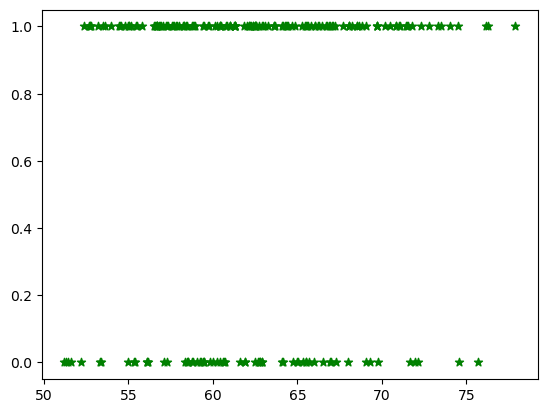

In [37]:
plt.scatter(x='mba_p',y='status',data=df,marker='*',color='green')
plt.show()

## Data Modelling

#### Model building using Logistic Regression

### Logistic Regression:
- Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class.
-  It takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. 

### Analyze the model for logistic regression using Train-Test-Split Method.
Train Dataset: Used to fit the machine learning model.                                                
Test Dataset: Used to evaluate the fit machine learning model.

#### Prepare x and y

In [38]:
x=df[['mba_p']]
x

,mba_p
0,58.80
1,66.28
2,57.80
3,59.43
4,55.50
...,...
210,74.49
211,53.62
212,69.72
213,60.23


In [40]:
y=df.status
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

#### Apply train, test to x and y 
Here we are using training set with the size of 0.66 (66 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

#### Print the shape for train and test data.

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(144, 1)
(71, 1)
(144,)
(71,)


#### Apply logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()
model

LogisticRegression()

#### Fit the model

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

#### Predict the y value

In [49]:
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [51]:
y_test

120    0
108    1
164    1
53     1
22     1
      ..
64     1
107    1
83     1
204    1
110    1
Name: status, Length: 71, dtype: int64

#### New dataframe for actual and predicted values as:

In [52]:
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
new_df

,Actual,Predicted
120,0,1
108,1,1
164,1,1
53,1,1
22,1,1
...,...,...
64,1,1
107,1,1
83,1,1
204,1,1


#### Predict x values

In [53]:
x_pred=model.predict(x_train)
x_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Now, let's check for the accuracy of logistic model.

In [67]:
acc=model.score(x_train,y_train)
acc*100

65.97222222222221

##### Model has 65.9% accuracy for train data.

In [68]:
acc=model.score(x_test,y_test)
acc*100

74.64788732394366

##### Model has 74.6% accuracy for test data.

#### For accurary check:

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
acc=accuracy_score(y_test,y_predict)
acc

0.7464788732394366

##### Model has 74.6% accuracy for test data.

#### Draw the classification report

In [63]:
from sklearn.metrics import classification_report

In [65]:
report =classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.75      1.00      0.85        53

    accuracy                           0.75        71
   macro avg       0.37      0.50      0.43        71
weighted avg       0.56      0.75      0.64        71



### Final Conclusion:
- Overall accuracy of the model is 74.6% which is good.
- Train Test Split method on logistic regression model fits good.